-------------------------------------
# **Daily climate data in the city of Delhi from 2013 to 2017**
-------------------------------------

--------------------
## **Context**
--------------------

Analyzing daily climate time series data is important because it provides crucial information about long-term weather patterns, climate change, and their potential impacts on the environment and society. By examining data on factors scientists can better understand how the climate is changing over time and identify potential trends and anomalies. This information is important for to make informed decisions related to land use, water management, disaster preparedness, and other areas that may be affected by climate change. Furthermore, analyzing daily climate data can help individuals and communities prepare for and mitigate the impacts of extreme weather events, leading to a more resilient and sustainable future.

-----------------------------
## **Key Questions**
-----------------------------

1. What are the different variables that influence wind speed?

------------------------------------
## **Dataset Description**
------------------------------------

This file contains weather data collected in the city of Delhi from the period of 4 years (from 2013 to 2017). The data set was obtained from: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTest.csv


* date: Date of format YYYY-MM-DD.
* meantemp: Mean temperature averaged out from multiple 3 hour intervals in a day.
* humidity: Humidity value for the day (units are grams of water vapor per cubic meter volume of air).
* wind_speed: Wind speed measured in kmph.
* meanpressure: Pressure reading of weather (measure in hPa)


##  **Importing the necessary libraries and overview of the dataset**

In [1]:
# Library to suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# Libraries to help with data visualization

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

### **Loading the dataset**

In [3]:
data = pd.read_csv('DailyDelhiClimate.csv')

In [4]:
# Copying data to another variable to avoid any changes to the original data
df = data.copy()

### **View the first 5 rows of the dataset**

In [5]:
# Looking at head (the first 5 observations) 
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


**Observations:**

* The column Date shows that the data starts from 10-Jan-2013.
* All of the rest of variables are numerical.


### **View the last 5 rows of the dataset**

In [6]:
# Looking at tail (the last 5 observations) 
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


**Observations:**

* The head indicated that the data began on Jan 01, 2013, whereas the tail indicates that it continued until Jan 1, 2017. This means we have **four years of data to analyze**.

### **Checking the shape of the dataset**

In [7]:
df.shape

(1462, 5)

* The dataset has **1462 rows and 7 columns**.

### **Checking the info()**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


**Observations:**

* All columns have 1462 observations.
* date is read as an 'object' data type, but it should have the data type as DateTime.


### **Summary of the data**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


* There is a significant discrepancy between the third quartile and the highest value for the wind speed, indicating that these variables may have outliers to the right.

**By default, the describe() function shows the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

In [10]:
df.describe(exclude = 'number').T

,count,unique,top,freq
date,1462,1462,2013-01-01,1


**Observations:**

* Each row represent data for only one day.


### **Extracting date parts from pickup date**

In [11]:
# Converting pickup_dt datatype to datetime 

df.pickup_dt = pd.to_datetime(df.date)

# Extracting date parts from pickup_dt

df['start_year'] = df.pickup_dt.dt.year

df['start_month'] = df.pickup_dt.dt.month_name()

df['start_day'] = df.pickup_dt.dt.day

df['week_day'] = df.pickup_dt.dt.day_name()

In [12]:
# Removing Data column as it will not be required for further analysis

df.drop('date', axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   start_year    1462 non-null   int64  
 5   start_month   1462 non-null   object 
 6   start_day     1462 non-null   int64  
 7   week_day      1462 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 91.5+ KB


### **Missing value treatment**

In [14]:
# Checking missing values

df.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
start_year      0
start_month     0
start_day       0
week_day        0
dtype: int64

* There are no missing values in the data.

## **Exploratory Data Analysis: Univariate**

**Let us explore the numerical variables first.**

In [15]:
# While doing a univariate analysis of numerical variables, we want to study their central tendency and dispersion

# Lets write a function that will help us create a boxplot and histogram for any numerical variable

# This function takes the numerical variable as the input and returns the boxplots and histograms for that variable

# This would help us write faster and cleaner code

def histogram_boxplot(feature, figsize = (15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    # Creating the subplots
    
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    
    # For histogram
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, kde = False, ax = ax_hist2)
    
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

### **Observations on Mean temperature averaged out from multiple 3 hour intervals in a day**

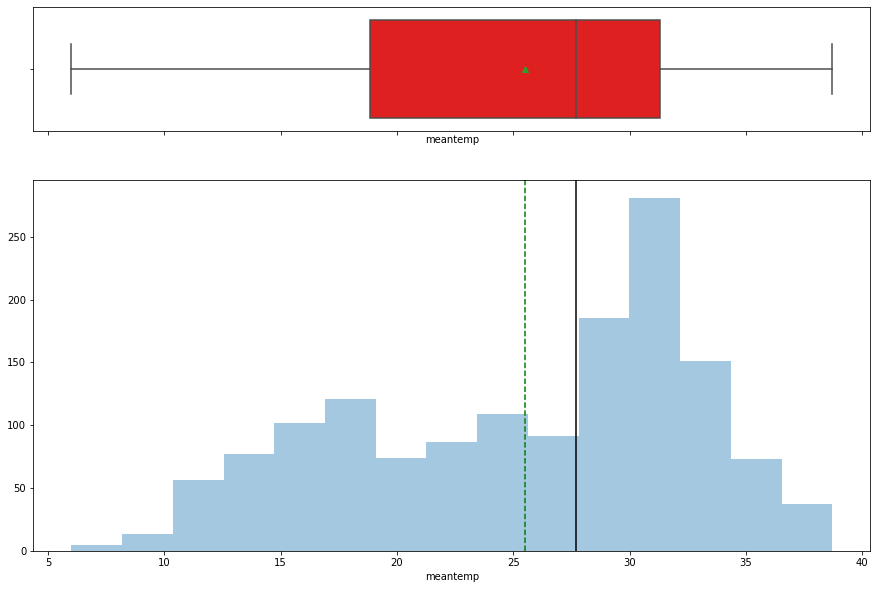

In [16]:
histogram_boxplot(df.meantemp)

**Observations:**
* The distribution has two peaks (Bi-modal), one at around 32 C and the other at around 18 C. The hump is greater at 32 C.
* The majority of the temperatures are close to 32 C.
* Median temperatures are equal to 27 C, but the mean is ~25 C.
* There are a not outliers in this variable.
* Thetemperatures are in a range between ~6C - ~38 C .

###  **Observations on Humidity**

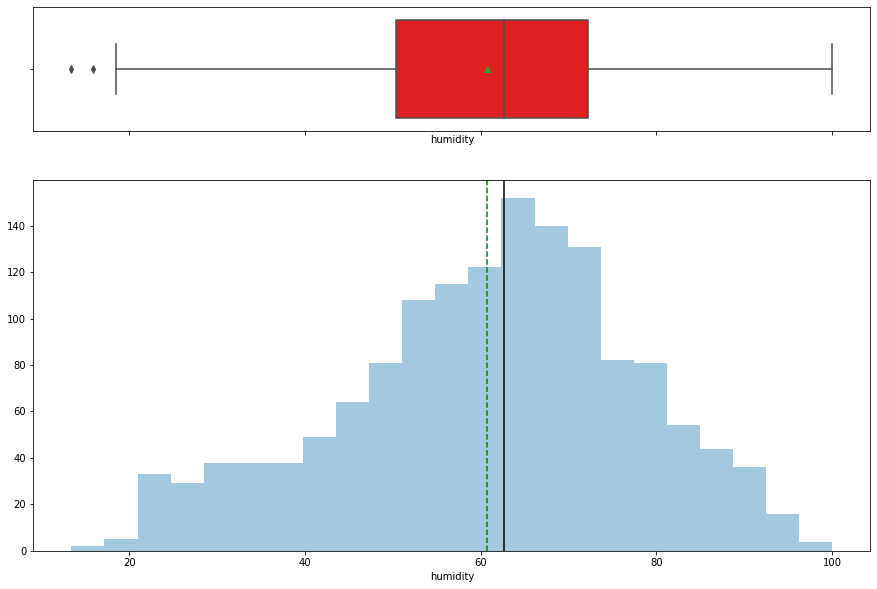

In [17]:
histogram_boxplot(df.humidity)

**Observations:**

* Humidity distribution looks approximately normal.
* There are a few outliers on the left side.

### **Observations on mean pressure**

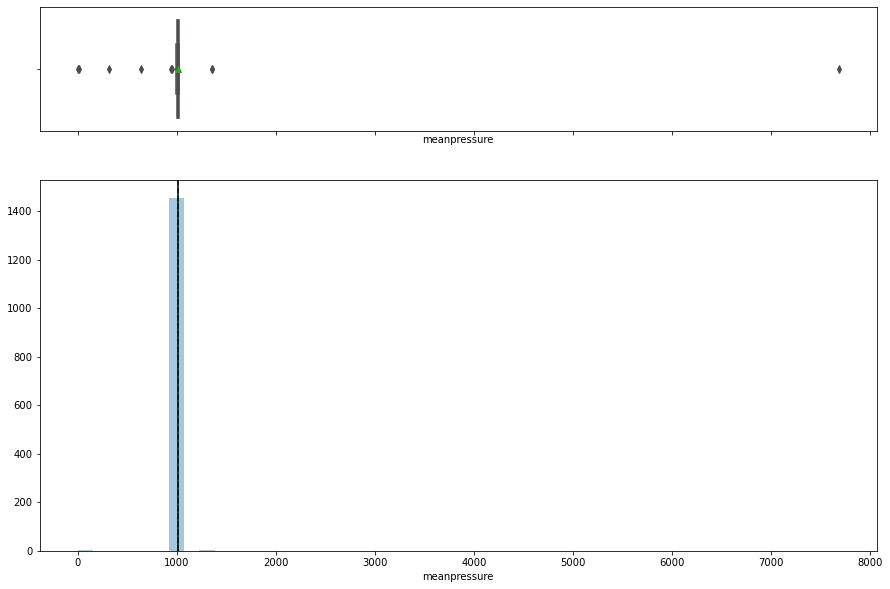

In [18]:
histogram_boxplot(df.meanpressure)

**Observations:**

* The majority of the mean preassures are close to 1000 hPa.
* There are outliers in the variable.

## **Exploratory Data Analysis: Multivariate**

**Let's plot multivariate charts between variables to understand their interaction with each other.**

### Correlation

In [19]:
df.keys()

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'start_year',
       'start_month', 'start_day', 'week_day'],
      dtype='object')

<AxesSubplot:>

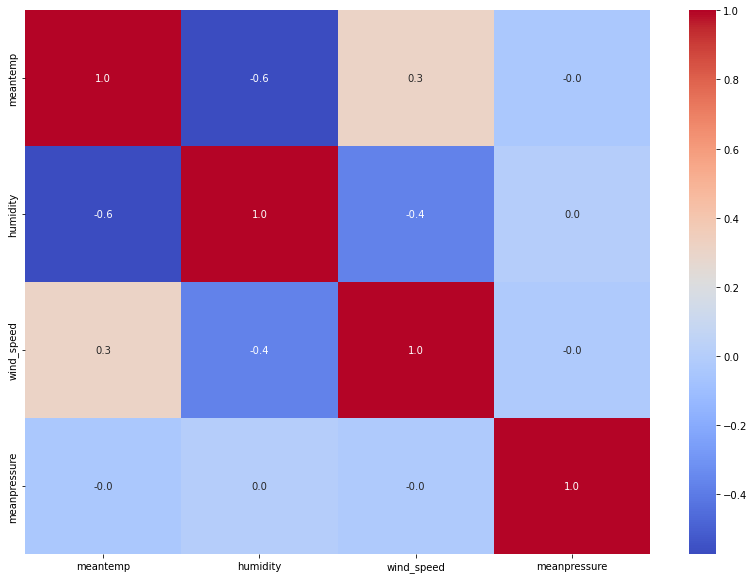

In [20]:
# Check for correlation among numerical variables

num_var = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

corr = df[num_var].corr()

# Plot the heatmap

plt.figure(figsize = (14, 10))

sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            
        fmt = ".1f",
            
        xticklabels = corr.columns,
            
        yticklabels = corr.columns)

**Observations:**

* mean temperature shows a high negative correlation with humidity.
* The wind speed have a moderate correlation with the humidity and the mean temperature.
* It is important to note that correlation does not imply causation.
* There does not seem to be a strong relationship between the mean preassure and humidity and wind speed .


### **Pair Plot**

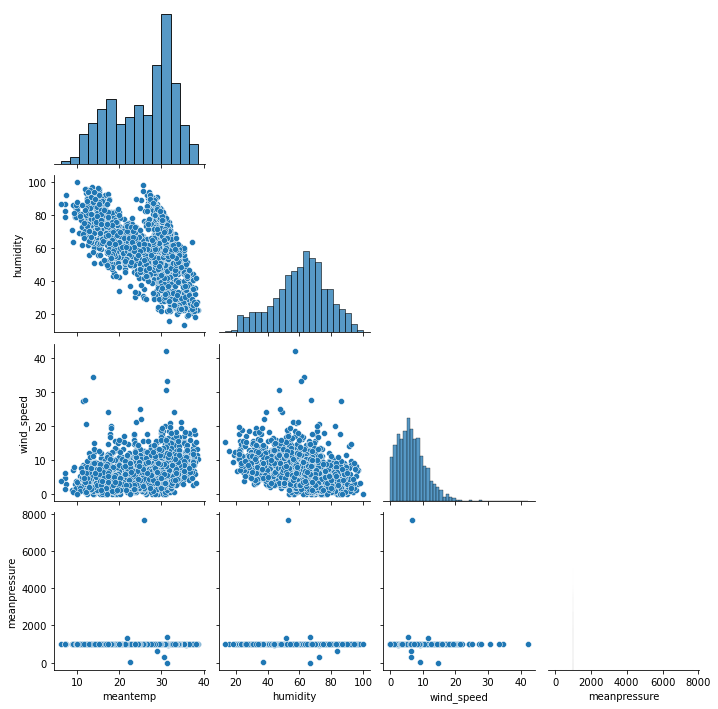

In [21]:
sns.pairplot(df[num_var], corner = True)

plt.show()

**Observations:**

* The correlation plot provides the same insights.
* As observed earlier, there does not seem to be a strong relationship between the mean preassure and the rest of the variables.

### **Relationship between wind speed and time based variables**

### **wind speed across Months**

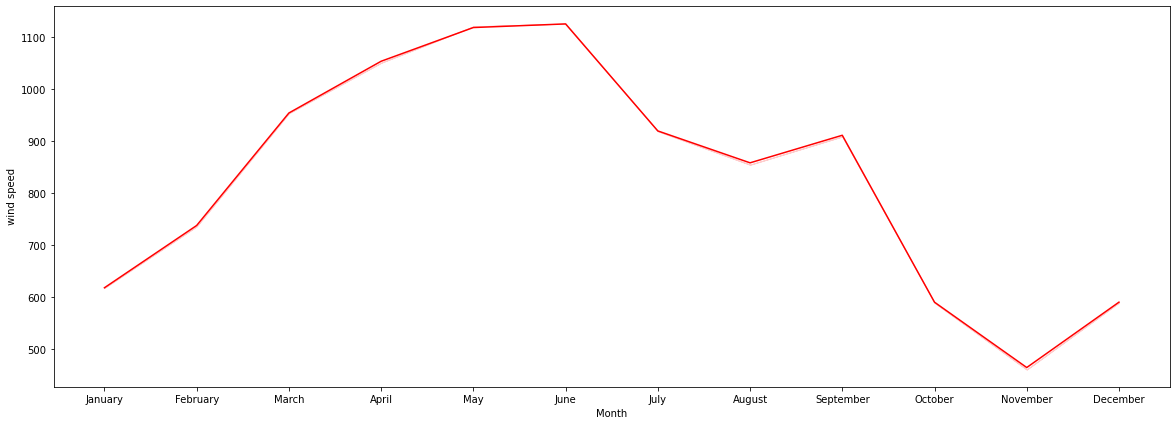

In [22]:
cats = df.start_month.unique().tolist()

df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)

plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_month", y = "wind_speed", data = df, ci = 0, color = "RED", estimator = 'sum')

plt.ylabel(' wind speed')

plt.xlabel('Month')

plt.show()

**Observations:**
* There is a clear increasing in the wind's speed in around May- June.
* There is a peak around september.
* November have the slowest speed.

### **wind speed  vs Days of the Month**

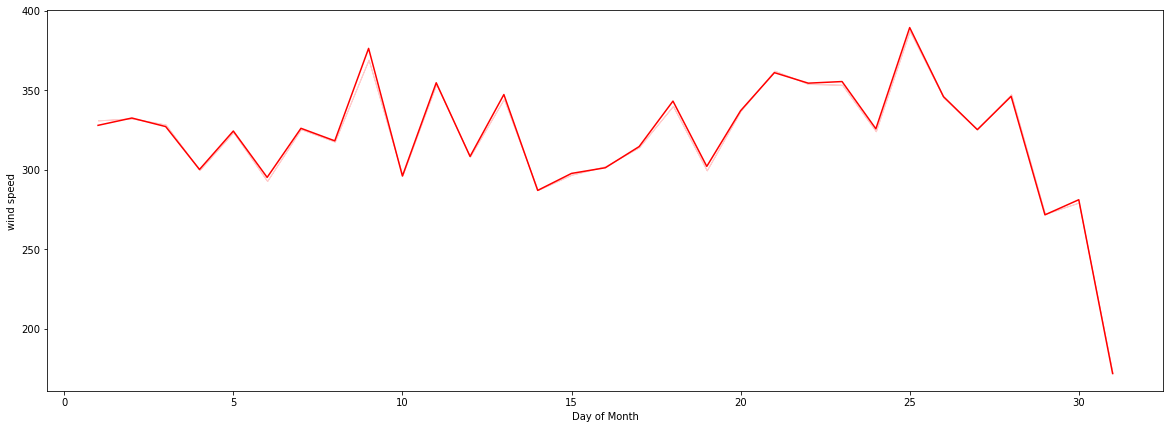

In [23]:
plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_day", y = "wind_speed", estimator = 'sum', ci = 0, data = df, color = "RED")

plt.ylabel('wind speed')

plt.xlabel('Day of Month')

plt.show()

**Observations:**
* There is a steep fall in the values on the last day of the month.
* This can partially be attributed to Feb having just 28 days. We can drop Feb and have a look at this chart again.

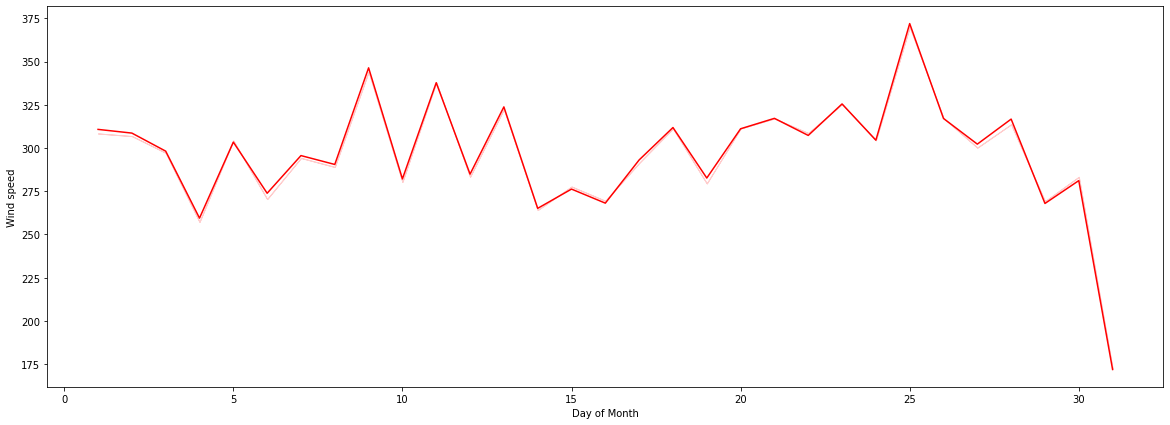

In [24]:
# Let's drop the Feb month and visualize again

df_not_feb =  df[df['start_month'] != 'February']

plt.figure(figsize = (20, 7))

sns.lineplot(x = "start_day", y = "wind_speed", estimator = 'sum', ci = 0, data = df_not_feb, color = "RED")

plt.ylabel('Wind speed')

plt.xlabel('Day of Month')

plt.show()

**Observations:**
* As expected, we observe that the day of the month is not a good variable to correlationate with the winds speed.
* Values for 31 is still low because not all months have the 31st day.

### **wind speed  vs Weekdays**

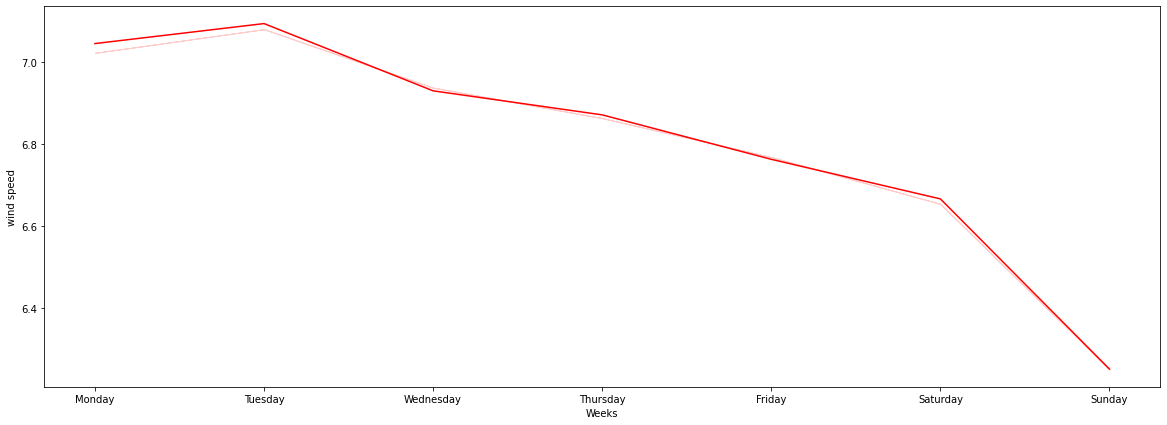

In [25]:
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)

plt.figure(figsize = (20, 7))

sns.lineplot(x = "week_day", y = "wind_speed", ci = 0, data = df, color = "RED")

plt.ylabel('wind speed')

plt.xlabel('Weeks')

plt.show()

**Observations:**
* Wind speed gradually decrease as the week progresses.
* We need to do more investigation to understand why. Even so, it may be due to mere coincidence.

### **Wind speed vs. Mean temperature**

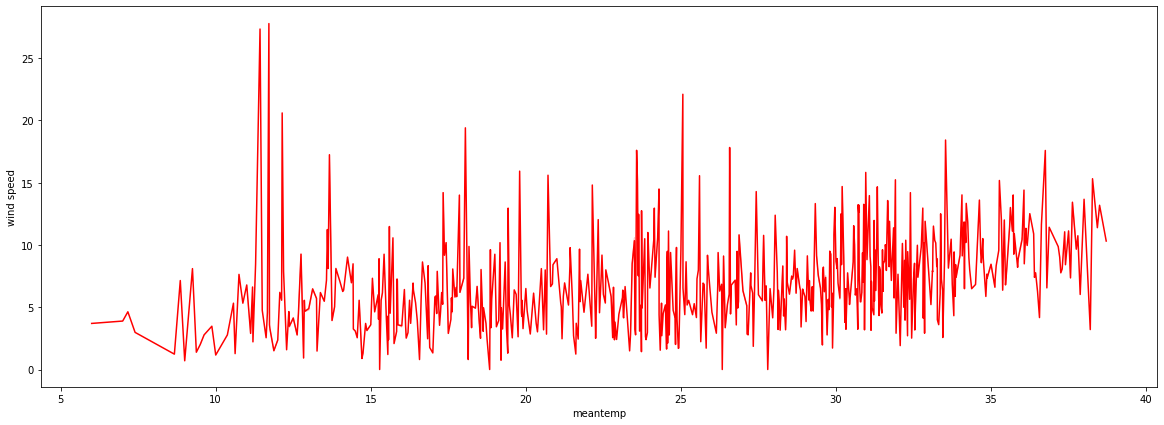

In [26]:

plt.figure(figsize = (20, 7))

sns.lineplot(x = "meantemp", y = "wind_speed", ci = 0, data = df, color = "RED")

plt.ylabel('wind speed')

plt.xlabel('meantemp')

plt.show()

**Observations:**
* Wind speed tends rto be higher with higher temperatures

### **Wind speed vs. Humidity**

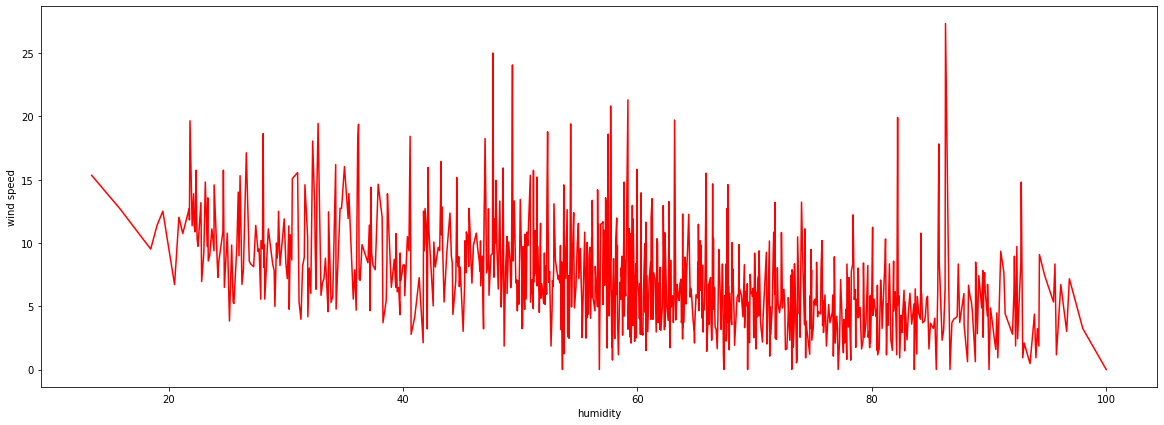

In [27]:

plt.figure(figsize = (20, 7))

sns.lineplot(x = "humidity", y = "wind_speed", ci = 0, data = df, color = "RED")

plt.ylabel('wind speed')

plt.xlabel('humidity')

plt.show()

**Observations:**
* Wind speed tends rto be lower with lower values of humidity.

## **Conclusion**

-----------------------------------------------------------------
### **Conclusion**
-----------------------------------------------------------------

​
We have been able to conclude that: 
​
1. The wind speed is higher between April and June.
2. Wind speed tends rto be lower with lower values of humidity.
3. Wind speed tends rto be higher with higher temperatures